# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=2))

{
  "coord": {
    "lon": -126.83,
    "lat": 65.28
  },
  "weather": [
    {
      "id": 804,
      "main": "Clouds",
      "description": "overcast clouds",
      "icon": "04n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 10,
    "pressure": 1008,
    "humidity": 81,
    "temp_min": 10,
    "temp_max": 10
  },
  "visibility": 48279,
  "wind": {
    "speed": 2.1,
    "deg": 90
  },
  "clouds": {
    "all": 90
  },
  "dt": 1569977572,
  "sys": {
    "type": 1,
    "id": 951,
    "message": 0.007,
    "country": "CA",
    "sunrise": 1569940615,
    "sunset": 1569981415
  },
  "timezone": -21600,
  "id": 6089245,
  "name": "Norman Wells",
  "cod": 200
}


In [12]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
lat = []
lng = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Sampit
Processing Record 2 | Nizhneudinsk
Processing Record 3 | Rikitea
Processing Record 4 | Nome
Processing Record 5 | Yerbogachen
City not found. Skipping...
Processing Record 6 | Ushuaia
Processing Record 7 | Esperance
Processing Record 8 | Puerto Ayora
Processing Record 9 | Fortuna
Processing Record 10 | Zeya
Processing Record 11 | Cortez
Processing Record 12 | Ribeira Grande
Processing Record 13 | Erzin
Processing Record 14 | Narkanda
Processing Record 15 | Timbuktu
Processing Record 16 | Tuktoyaktuk
Processing Record 17 | Vestmanna
Processing Record 18 | Bredasdorp
Processing Record 19 | Mataura
Processing Record 20 | Saskylakh
Processing Record 21 | Fort Nelson
Processing Record 22 | Ilulissat
Processing Record 23 | Busselton
Processing Record 24 | Nikolskoye
Processing Record 25 | Hilo
Processing Record 26 | Ostrovnoy
Processing Record 27 | Khatanga
Processing Record 28 | Puerto Leguizamo
Processing

Processing Record 226 | Nantucket
Processing Record 227 | Meulaboh
Processing Record 228 | Cartagena
Processing Record 229 | Cervo
City not found. Skipping...
Processing Record 230 | College
Processing Record 231 | Kahului
Processing Record 232 | Avera
Processing Record 233 | Houma
Processing Record 234 | Walvis Bay
Processing Record 235 | Spornoye
Processing Record 236 | Victor Harbor
City not found. Skipping...
Processing Record 237 | Sitka
Processing Record 238 | Wattegama
Processing Record 239 | Kolondieba
Processing Record 240 | Bubaque
Processing Record 241 | Yicheng
Processing Record 242 | Necocli
Processing Record 243 | Ust-Kuyga
Processing Record 244 | Arahal
Processing Record 245 | Kaitangata
Processing Record 246 | Dali
Processing Record 247 | Sawtell
Processing Record 248 | Bethel
City not found. Skipping...
Processing Record 249 | Provideniya
Processing Record 250 | Isla Vista
Processing Record 251 | Naberera
Processing Record 252 | Nangomba
Processing Record 253 | Vila Ve

Processing Record 451 | Chapleau
Processing Record 452 | Usolye-Sibirskoye
Processing Record 453 | Fougamou
Processing Record 454 | Alcazar de San Juan
Processing Record 455 | Grand-Santi
Processing Record 456 | Lorengau
Processing Record 457 | Bajil
Processing Record 458 | Baneh
Processing Record 459 | Lerwick
Processing Record 460 | Navolato
Processing Record 461 | Daru
Processing Record 462 | Srednekolymsk
Processing Record 463 | Ranau
Processing Record 464 | Jiexiu
Processing Record 465 | Hervey Bay
Processing Record 466 | Wanxian
Processing Record 467 | Valdivia
Processing Record 468 | Bud
Processing Record 469 | Carroll
Processing Record 470 | Gua Musang
Processing Record 471 | Sibu
Processing Record 472 | Kwinana
Processing Record 473 | Atambua
Processing Record 474 | Ust-Ordynskiy
Processing Record 475 | Pacific Grove
Processing Record 476 | Malmesbury
Processing Record 477 | Suntar
Processing Record 478 | Guipavas
Processing Record 479 | Orleans
Processing Record 480 | Mbalmay

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:

# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [16]:
# Display DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sampit,93,ID,1569978106,86,-2.54,112.95,25.56,1.49
1,Nizhneudinsk,0,RU,1569978106,84,54.91,99.03,-1.54,0.67
2,Rikitea,72,PF,1569978044,84,-23.12,-134.97,20.37,7.80
3,Nome,1,US,1569978106,74,30.04,-94.42,28.33,1.50
4,Yerbogachen,80,RU,1569978106,80,61.28,108.01,-2.19,3.25


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [17]:
# Export & Save Data Into a .csv.
weather_data.to_csv("./Data/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

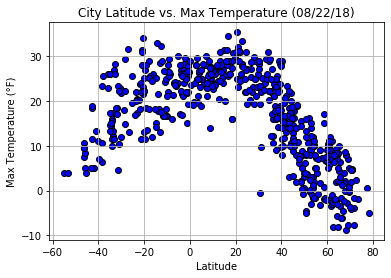

In [18]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

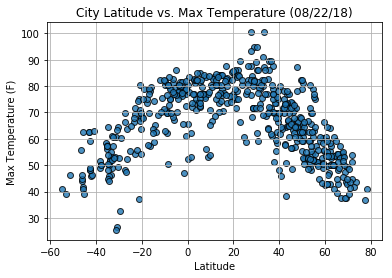

#### Latitude vs. Humidity Plot

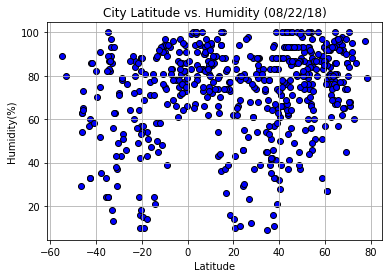

In [19]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

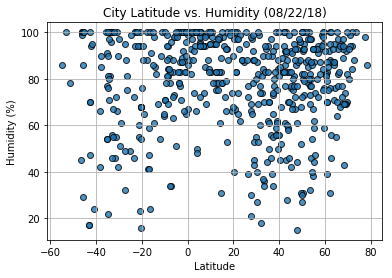

#### Latitude vs. Cloudiness Plot

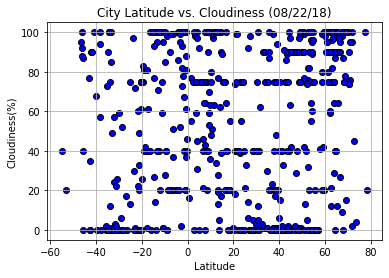

In [20]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

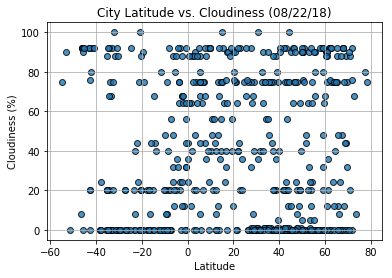

#### Latitude vs. Wind Speed Plot

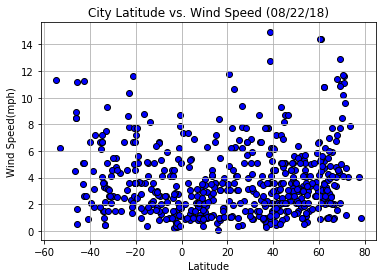

In [21]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Wind Speed.png")

# Show Plot
plt.show()

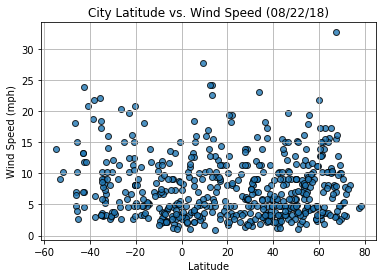